In [11]:
from lifelines.datasets import load_dd

from lifelines import KaplanMeierFitter

import matplotlib.pyplot as plt

import pandas as pd

In [14]:
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [15]:
kmf = KaplanMeierFitter()

In [17]:
kmf.fit(durations = data["duration"], event_observed = data["observed"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

<Axes: xlabel='timeline'>

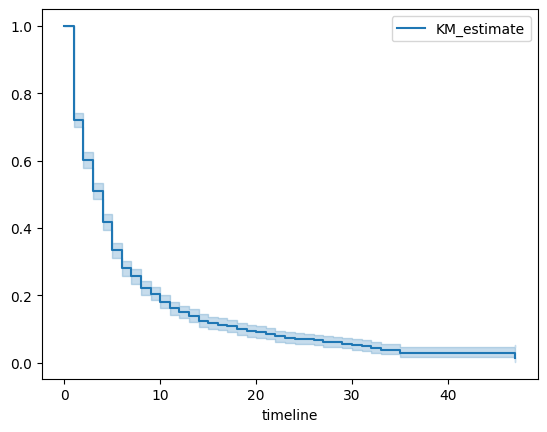

In [18]:
kmf.plot_survival_function()

In [19]:
democracies = data[data["democracy"] != "Non-democracy"]
dictatorships = data[data["democracy"] == "Non-democracy"]  

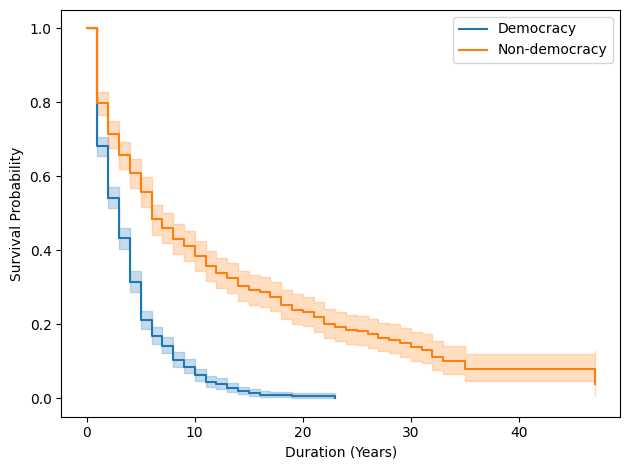

In [20]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots() 
for label, group in data.groupby("democracy"):
    kmf.fit(durations = group["duration"], event_observed = group["observed"], label=label)
    kmf.plot_survival_function(ax=ax)
ax.set_xlabel("Duration (Years)")
ax.set_ylabel("Survival Probability")
fig.tight_layout()
plt.show()